<a href="https://colab.research.google.com/github/Izzaara/dataanalysis/blob/main/churn_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df= pd.read_csv('churn-data-v2.csv')
df.head()



,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction,evaluation,average_montly_hours
count,14990.000000,14936.000000,14973.000000
mean,0.612817,716.085297,201.050424
std,0.248704,171.529563,49.986445
min,0.090000,360.000000,96.000000
25%,0.440000,560.000000,156.000000
50%,0.640000,720.000000,200.000000
75%,0.820000,870.000000,245.000000
max,1.000000,1000.000000,310.000000


In [ ]:
df.isnull().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [8]:
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,570.0,two,151.0,3+,no,yes,no,support,low
14995,0.37,480.0,two,160.0,3+,no,yes,no,support,low
14996,0.37,530.0,two,143.0,3+,no,yes,no,support,low
14997,0.11,960.0,six,280.0,4+,no,yes,no,support,low


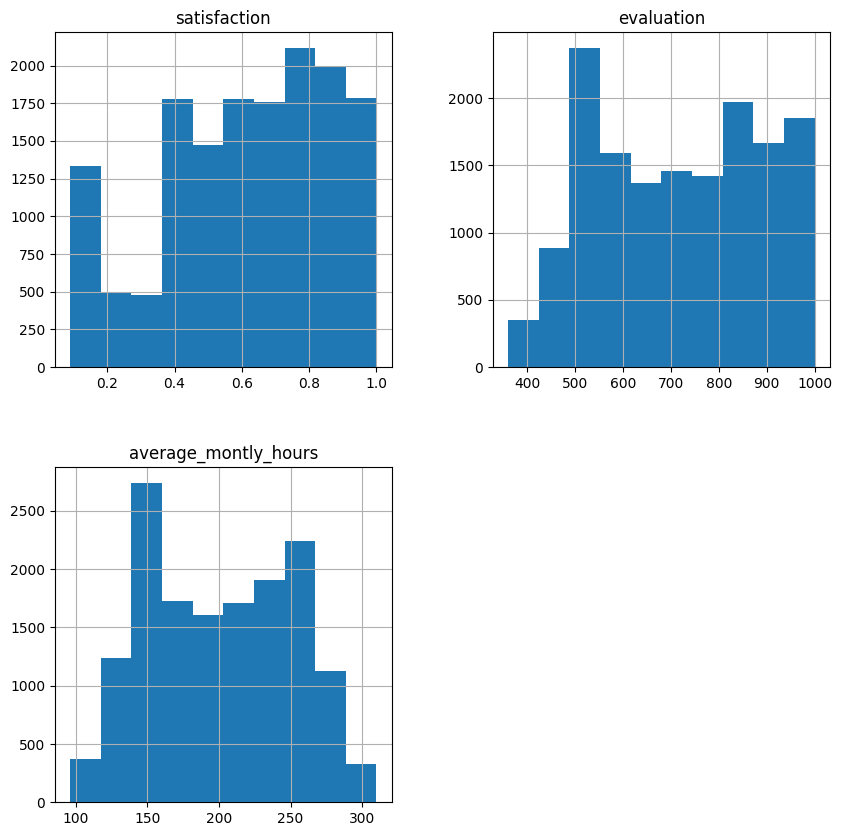

In [10]:
import matplotlib.pyplot as plt
freqplot= df.select_dtypes(include=['float','int'])
freqplot.hist(figsize=(10,10))
plt.show()


In [15]:
col =['satisfaction','evaluation','average_montly_hours']
col

['satisfaction', 'evaluation', 'average_montly_hours']

In [16]:
for i in col:
  df[i]=df[i].fillna(df[i].median())
df.isna().sum()

,0
satisfaction,0
evaluation,0
number_of_projects,44
average_montly_hours,0
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [17]:
df.describe()

,satisfaction,evaluation,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.612834,716.101740,201.048603
std,0.248631,171.169111,49.943118
min,0.090000,360.000000,96.000000
25%,0.440000,560.000000,156.000000
50%,0.640000,720.000000,200.000000
75%,0.820000,870.000000,245.000000
max,1.000000,1000.000000,310.000000


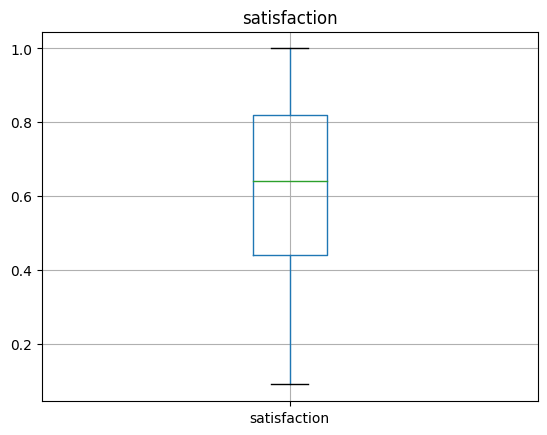

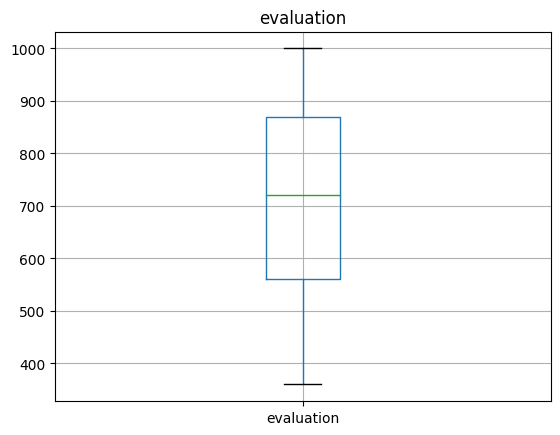

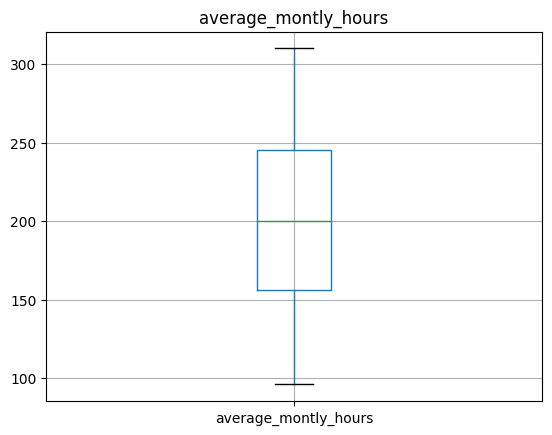

In [18]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
product_type_order = ['two','five','seven','six', 'four', 'three']
oe = OrdinalEncoder(categories=[product_type_order], handle_unknown='use_encoded_value', unknown_value=np.nan)
df['number_of_projects'] = oe.fit_transform(df[['number_of_projects']])
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,0.0,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,1.0,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,2.0,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,1.0,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,0.0,159.0,3+,no,yes,no,sales,low


In [23]:
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,0.0,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,1.0,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,2.0,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,1.0,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,0.0,159.0,3+,no,yes,no,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,570.0,0.0,151.0,3+,no,yes,no,support,low
14995,0.37,480.0,0.0,160.0,3+,no,yes,no,support,low
14996,0.37,530.0,0.0,143.0,3+,no,yes,no,support,low
14997,0.11,960.0,3.0,280.0,4+,no,yes,no,support,low


In [24]:
product_type_order = ['yes','no']
oe = OrdinalEncoder(categories=[product_type_order], handle_unknown='use_encoded_value', unknown_value=np.nan)
df['work_accident'] = oe.fit_transform(df[['work_accident']])
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,0.0,157.0,3+,1.0,yes,no,sales,low
1,0.80,860.0,1.0,262.0,6+,1.0,yes,no,sales,medium
2,0.11,880.0,2.0,272.0,4+,1.0,yes,no,sales,medium
3,0.72,870.0,1.0,223.0,5+,1.0,yes,no,sales,low
4,0.37,520.0,0.0,159.0,3+,1.0,yes,no,sales,low


In [25]:
product_type_order = ['yes']
oe = OrdinalEncoder(categories=[product_type_order], handle_unknown='use_encoded_value', unknown_value=np.nan)
df['churn'] = oe.fit_transform(df[['churn']])
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,0.0,157.0,3+,1.0,0.0,no,sales,low
1,0.80,860.0,1.0,262.0,6+,1.0,0.0,no,sales,medium
2,0.11,880.0,2.0,272.0,4+,1.0,0.0,no,sales,medium
3,0.72,870.0,1.0,223.0,5+,1.0,0.0,no,sales,low
4,0.37,520.0,0.0,159.0,3+,1.0,0.0,no,sales,low


In [26]:
product_type_order = ['no']
oe = OrdinalEncoder(categories=[product_type_order], handle_unknown='use_encoded_value', unknown_value=np.nan)
df['promotion'] = oe.fit_transform(df[['promotion']])
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,0.0,157.0,3+,1.0,0.0,0.0,sales,low
1,0.80,860.0,1.0,262.0,6+,1.0,0.0,0.0,sales,medium
2,0.11,880.0,2.0,272.0,4+,1.0,0.0,0.0,sales,medium
3,0.72,870.0,1.0,223.0,5+,1.0,0.0,0.0,sales,low
4,0.37,520.0,0.0,159.0,3+,1.0,0.0,0.0,sales,low


In [27]:
product_type_order = ['sales']
oe = OrdinalEncoder(categories=[product_type_order], handle_unknown='use_encoded_value', unknown_value=np.nan)
df['department'] = oe.fit_transform(df[['department']])
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,0.0,157.0,3+,1.0,0.0,0.0,0.0,low
1,0.80,860.0,1.0,262.0,6+,1.0,0.0,0.0,0.0,medium
2,0.11,880.0,2.0,272.0,4+,1.0,0.0,0.0,0.0,medium
3,0.72,870.0,1.0,223.0,5+,1.0,0.0,0.0,0.0,low
4,0.37,520.0,0.0,159.0,3+,1.0,0.0,0.0,0.0,low


In [28]:
product_type_order = ['low','medium']
oe = OrdinalEncoder(categories=[product_type_order], handle_unknown='use_encoded_value', unknown_value=np.nan)
df['salary'] = oe.fit_transform(df[['salary']])
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,0.0,157.0,3+,1.0,0.0,0.0,0.0,0.0
1,0.80,860.0,1.0,262.0,6+,1.0,0.0,0.0,0.0,1.0
2,0.11,880.0,2.0,272.0,4+,1.0,0.0,0.0,0.0,1.0
3,0.72,870.0,1.0,223.0,5+,1.0,0.0,0.0,0.0,0.0
4,0.37,520.0,0.0,159.0,3+,1.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
for column in df.select_dtypes(include=['number']):
    mms = MinMaxScaler()
    df[column] = mms.fit_transform(df[[column]])
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.318681,0.265625,0.0,0.285047,3+,1.0,0.0,0.0,0.0,0.0
1,0.780220,0.781250,0.2,0.775701,6+,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,0.4,0.822430,4+,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.2,0.593458,5+,1.0,0.0,0.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,3+,1.0,0.0,0.0,0.0,0.0
